<a href="https://colab.research.google.com/github/OoMyGit/Data-Mining/blob/main/%5BAnswer%5D_Exercise_Week_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kwandy Chandra - 0706022210001

## Loading Library

In [127]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [128]:
#1
url = 'https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv'
df = pd.read_csv(url, delimiter = ',')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [129]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
#3 check missing values
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

**Total amount of missing values from each column.**

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


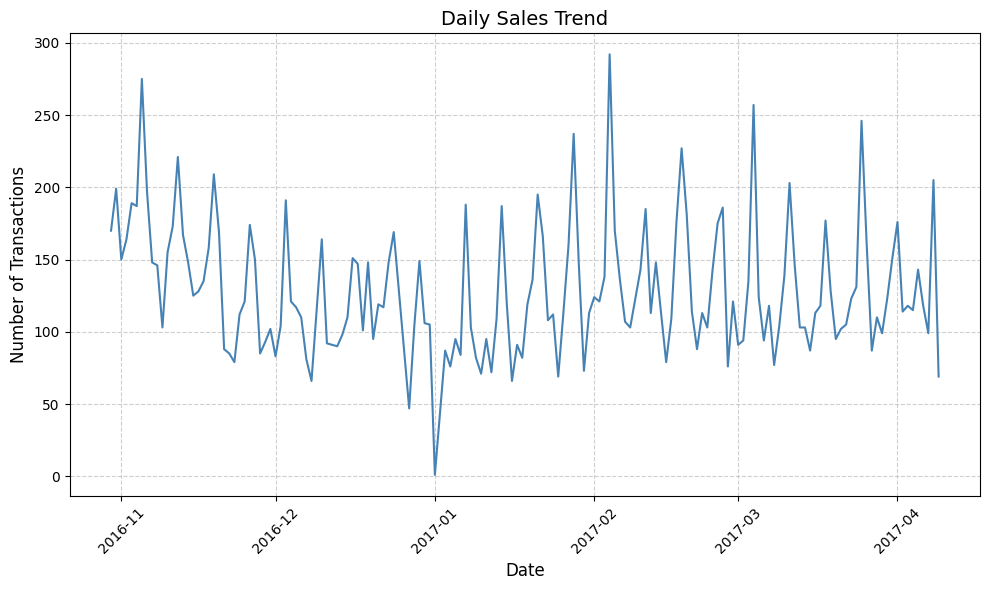

In [131]:
# 5
# Convert the date_time column to datetime format and extract the date
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

# Calculate the number of transactions per day
df['Date'] = df['date_time'].dt.date
daily_sales = df.groupby('Date')['Transaction'].count()

# Plot the daily sales trend
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, color='steelblue')
plt.title('Daily Sales Trend', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [132]:
# 6
# Extract additional time-based variables from the date_time column

df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()

# Display the updated dataframe structure to confirm the new columns are added
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,Date,day,month,year,time,hour,day_name
11010,5494,Coffee,2017-01-28 11:04:00,morning,weekend,2017-01-28,28,1,2017,11:04:00,11,Saturday
14837,7133,Coffee,2017-02-24 16:49:00,afternoon,weekday,2017-02-24,24,2,2017,16:49:00,16,Friday
19044,9019,Bread,2017-03-29 14:10:00,afternoon,weekday,2017-03-29,29,3,2017,14:10:00,14,Wednesday
1304,635,Soup,2016-11-05 15:53:00,afternoon,weekend,2016-11-05,5,11,2016,15:53:00,15,Saturday
3064,1490,Bread,2016-11-17 10:51:00,morning,weekday,2016-11-17,17,11,2016,10:51:00,10,Thursday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


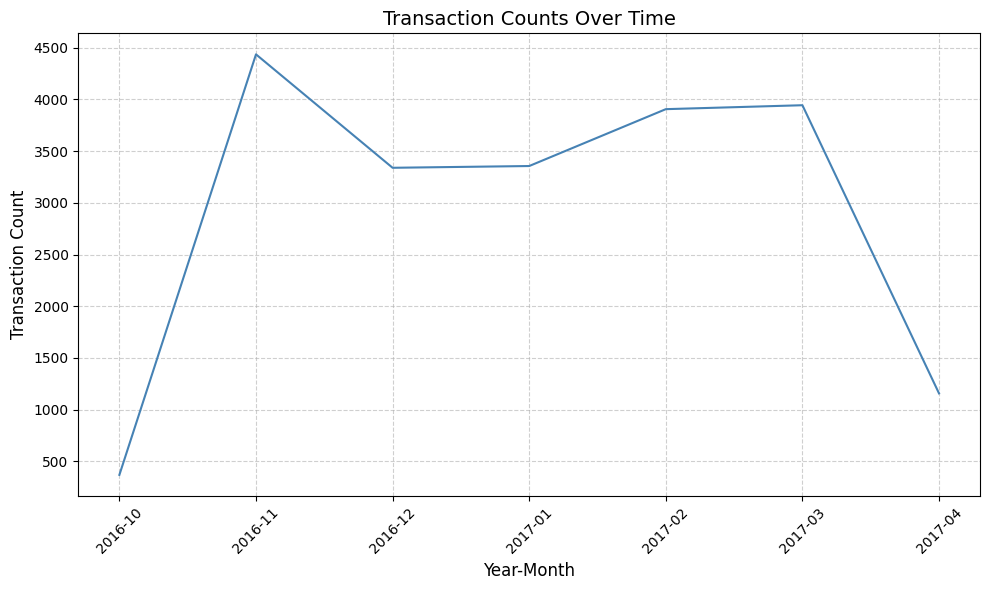

In [133]:
# 7
# Aggregate transaction data by year and month
df['year_month'] = df['date_time'].dt.to_period('M')
monthly_transactions = df.groupby('year_month')['Transaction'].count()

# Plot the monthly transaction counts
plt.figure(figsize=(10, 6))
plt.plot(monthly_transactions.index.astype(str), monthly_transactions.values, color='steelblue')
plt.title('Transaction Counts Over Time', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

**We can see more clearly the transaction counts overtime**

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [134]:
#9
# Get unique weekday and weekend names from the data
weekday_names = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
weekend_names = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()

print("Unique weekday_names:", weekday_names)
print("Unique weekend_names:", weekend_names)

Unique weekday_names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend_names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [150]:
#10
# Create an aggregation of total transactions by month and day_name
monthly_day_sales = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()

sales_table = pd.pivot_table(monthly_day_sales, values='Transaction', index='month', columns='day_name', fill_value=0)

# Display the resulting aggregation
desired_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_table = sales_table[desired_order]

sales_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329.0,474.0,322.0,399.0,489.0,807.0,536.0
2,474.0,429.0,419.0,456.0,599.0,879.0,650.0
3,379.0,433.0,459.0,557.0,674.0,883.0,559.0
4,118.0,115.0,143.0,118.0,99.0,381.0,183.0
10,199.0,0.0,0.0,0.0,0.0,0.0,170.0
11,469.0,599.0,576.0,591.0,639.0,879.0,683.0
12,356.0,342.0,402.0,525.0,624.0,776.0,314.0


11. Wow, it turns out the insight that can be gained from the table above is _____

**We can see which day of every month has the most transaction**


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


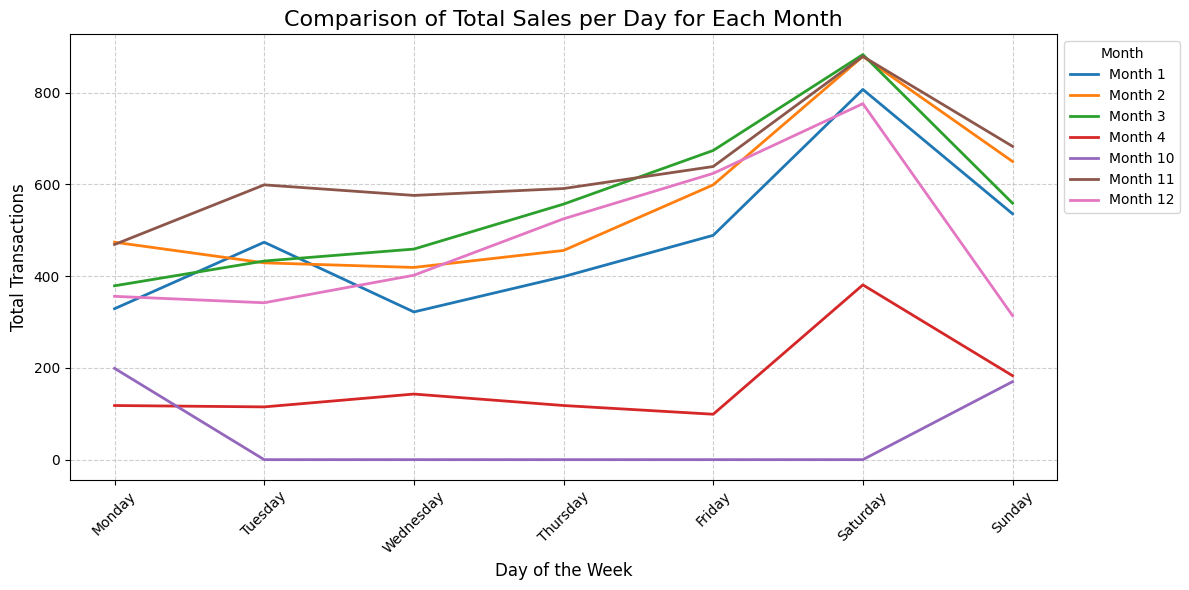

In [151]:
# 12
pivot_table_t = sales_table.T

plt.figure(figsize=(12, 6))

for month in pivot_table_t.columns:
    plt.plot(pivot_table_t.index, pivot_table_t[month], label=f'Month {month}', linewidth=2, markersize=6)

plt.title('Comparison of Total Sales per Day for Each Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

**Saturday is the best day with the highest sales**

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [137]:
# 14
# Get the unique values in the 'period_day' column
unique_period_day = df['period_day'].unique()
unique_period_day

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [138]:
# 15
# Get the unique hours for each period of the day
morning_hours = df[df['period_day'] == 'morning']['hour'].unique()
afternoon_hours = df[df['period_day'] == 'afternoon']['hour'].unique()
evening_hours = df[df['period_day'] == 'evening']['hour'].unique()
night_hours = df[df['period_day'] == 'night']['hour'].unique()

print("Unique morning_hour:", morning_hours)
print("Unique afternoon_hour:", afternoon_hours)
print("Unique evening_hour:", evening_hours)
print("Unique night_hour:", night_hours)

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

**The morning hour has '1' value in it. I think 1 is not considered as morning**


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


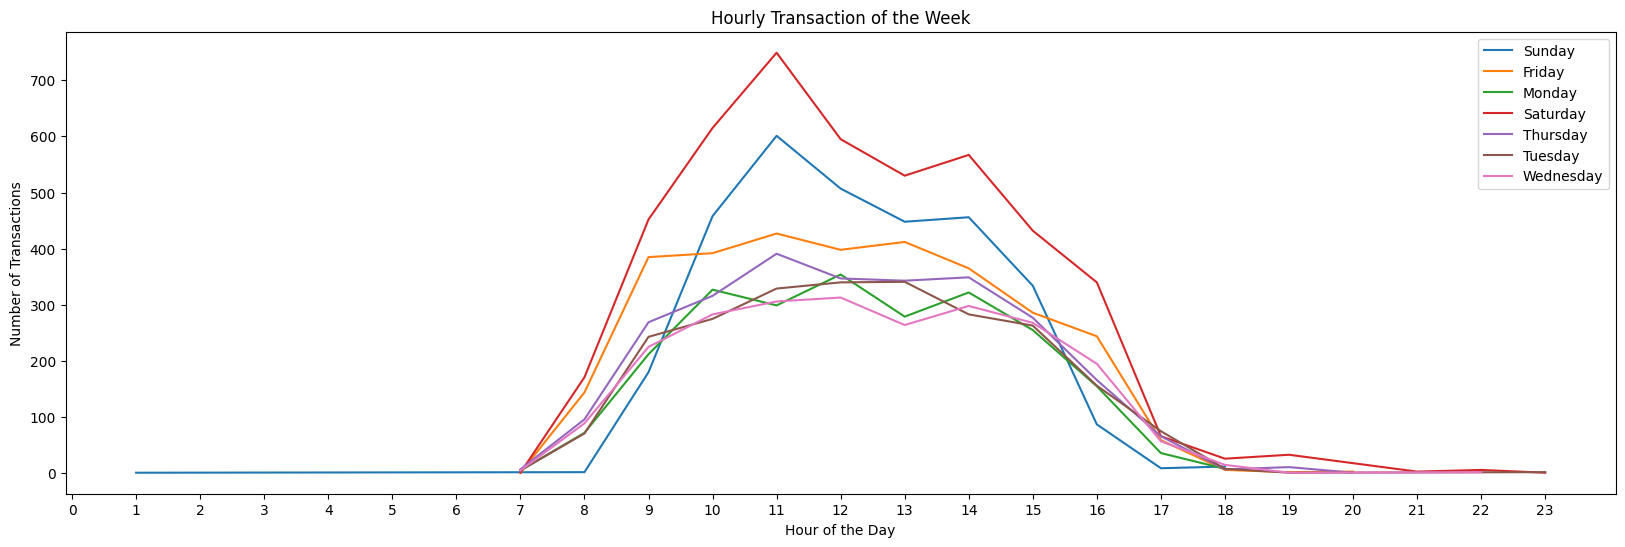

In [152]:
# 17
hourly_transactions = df.groupby(['day_name', 'hour'])['Transaction'].count().reset_index()

# Filter for the specified days (Sunday to Wednesday)
days_to_show = ['Sunday', 'Friday', 'Monday', 'Saturday', 'Thursday','Tuesday', 'Wednesday',]
filtered_transactions = hourly_transactions[hourly_transactions['day_name'].isin(days_to_show)]

plt.figure(figsize=(20, 6))
for day in days_to_show:
    day_data = filtered_transactions[filtered_transactions['day_name'] == day]
    plt.plot(day_data['hour'], day_data['Transaction'], label=day)

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Transaction of the Week')
plt.legend()
plt.xticks(range(24))
plt.show()

18. The daily sales trend plot reveals that _______

**11 is the peak hour and saturday is the peak day for transcation
Sales activity peaks between 9:00 and 14:00, with Saturday showing the highest transaction volume, likely due to customers having more free time. After 14:00, sales decline significantly and stay low through the evening and night. Early mornings (before 7:00) have minimal activity, reflecting typical shopping patterns.**

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


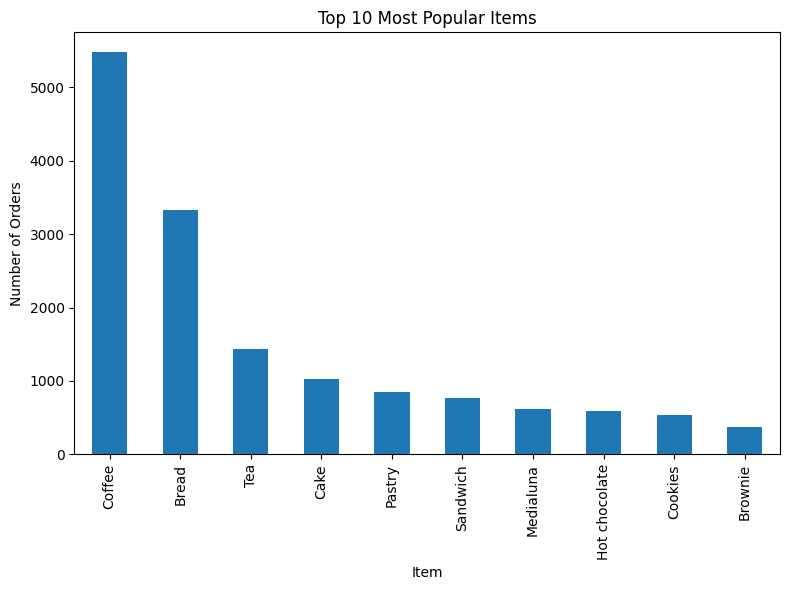

In [153]:
# 19
item_frequency = df.groupby('Item')['Transaction'].count().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 6))
item_frequency.head(10).plot(kind='bar')

plt.xlabel('Item')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Popular Items')
plt.xticks()
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-154-f2929de90290>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


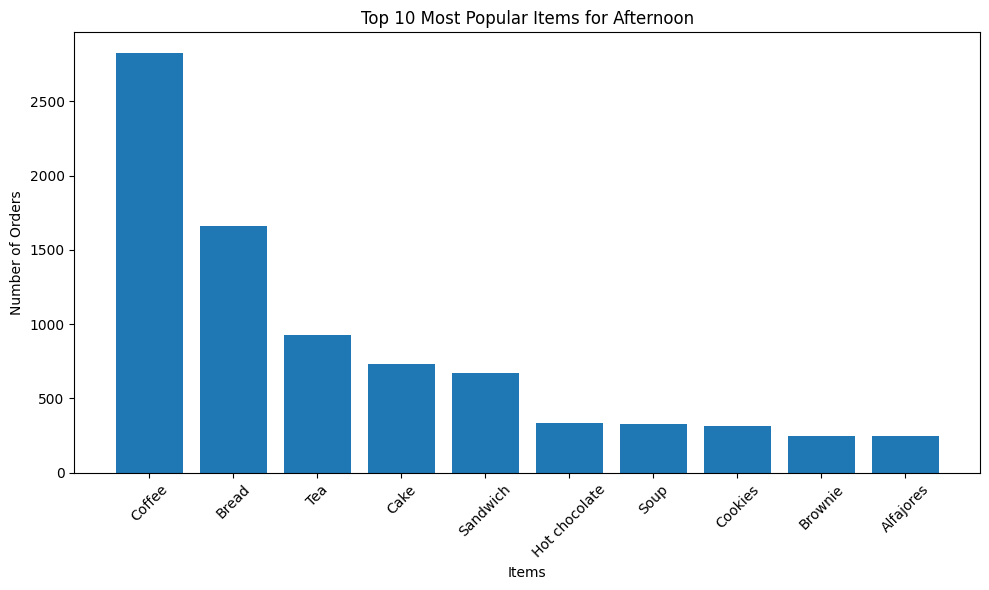

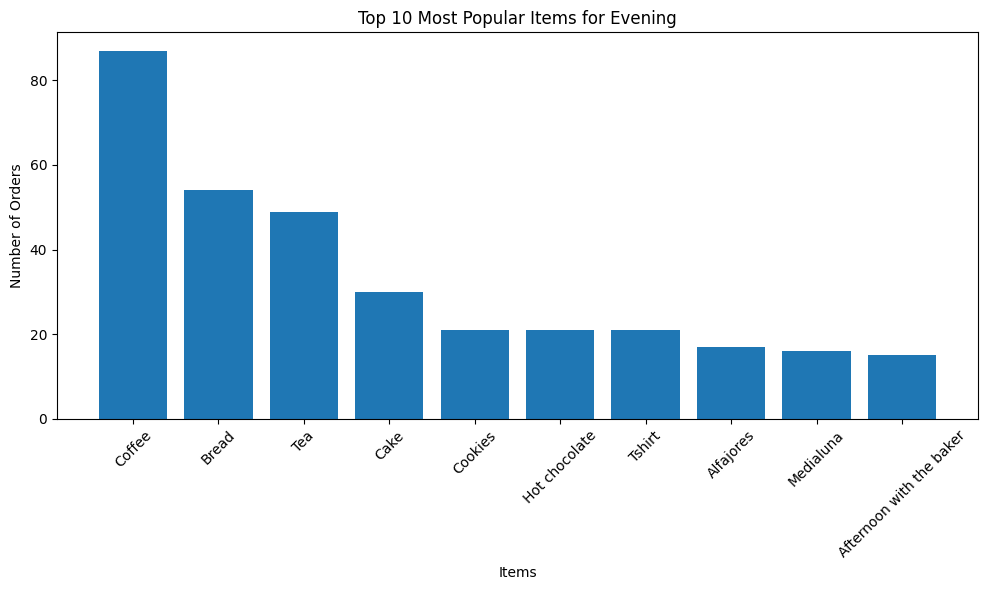

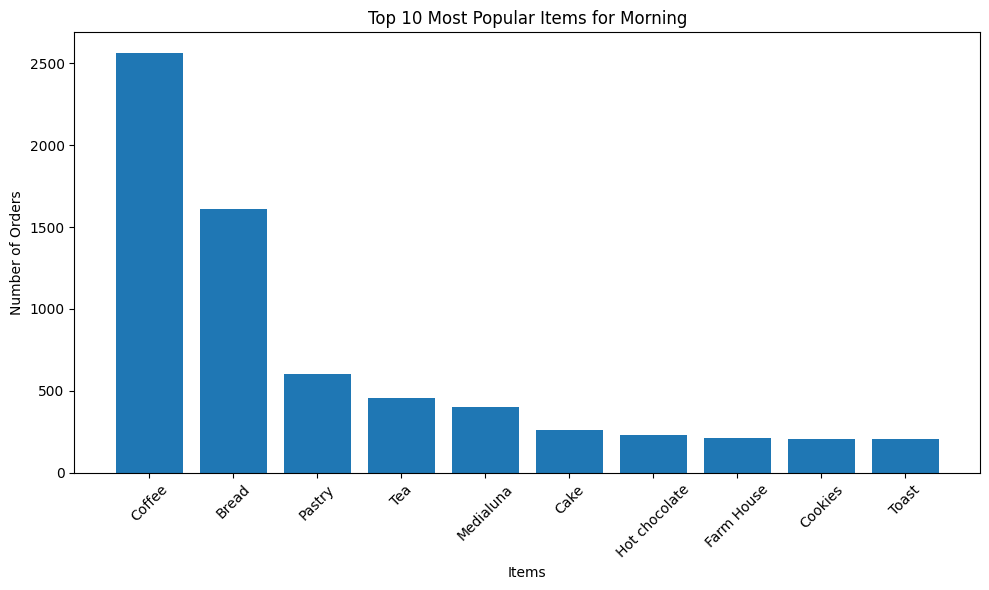

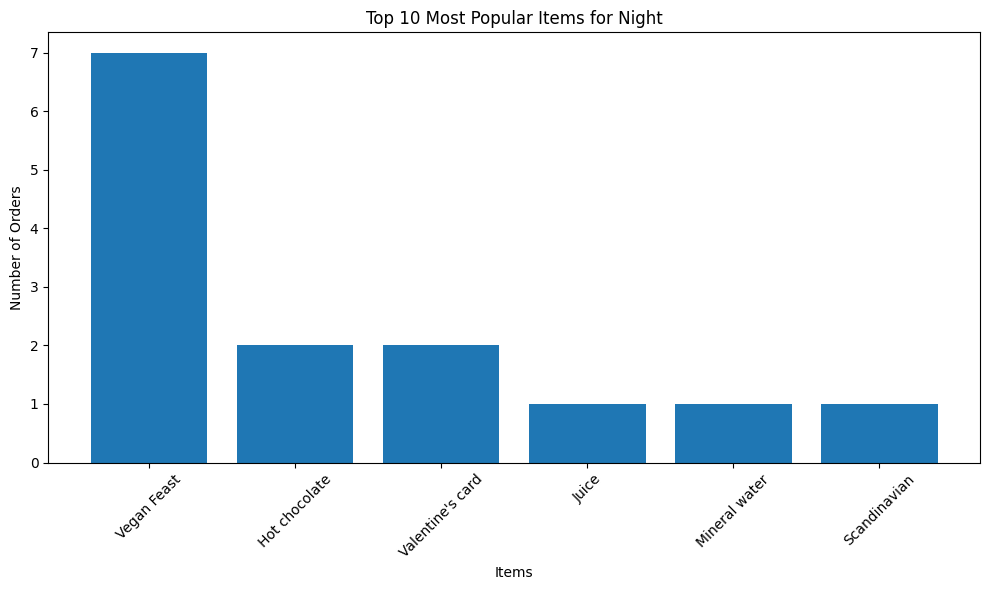

In [154]:
# 20
item_counts_by_period = df.groupby(['period_day', 'Item']).size().reset_index(name='count')

top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

periods = top_items_by_period['period_day'].unique()

for period in periods:
    data = top_items_by_period[top_items_by_period['period_day'] == period]

    plt.figure(figsize=(10, 6))

    plt.bar(data['Item'], data['count'])

    plt.xlabel('Items')
    plt.ylabel('Number of Orders')
    plt.title(f'Top 10 Most Popular Items for {period.capitalize()}')

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

21. It turns out that there is something different in the plot above, the insight is ____


**The store sold items in the night is different compared to morning, afternoon, evening**

**The most sold product is coffee**

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-155-d0740b65d89c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date


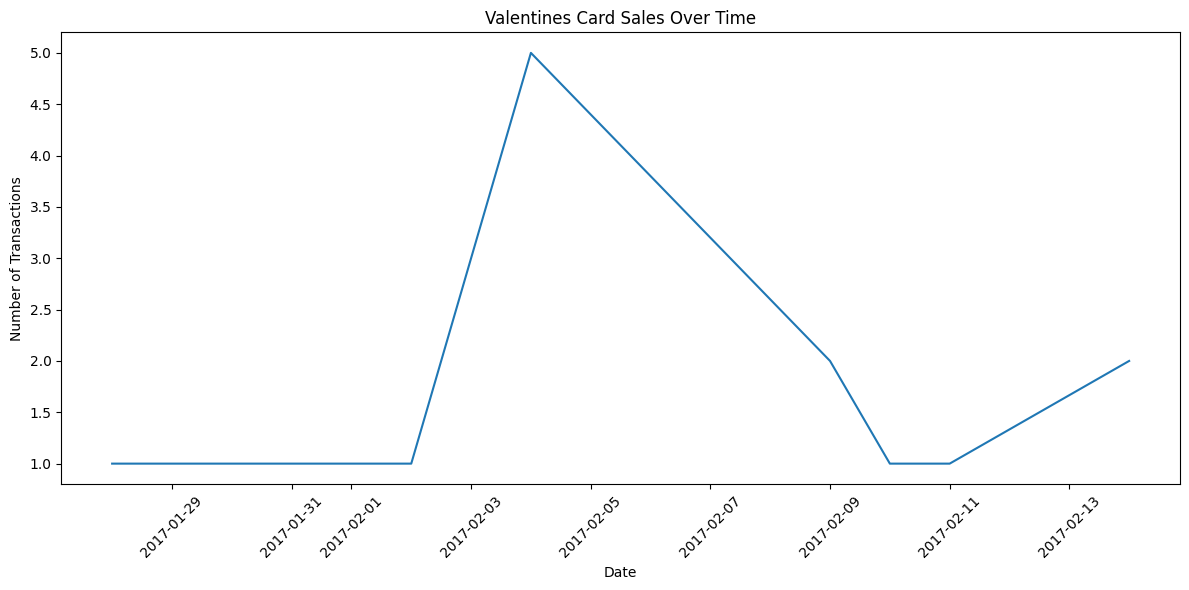

In [155]:
#22
valentine_sales = df[df['Item'].str.contains('Valentine', case=False, na=False)]

valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date
sales_by_date = valentine_sales.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-', label='Valentine Card Sales')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Valentines Card Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


**People only buy valentine cards from 3 February - 9 February, and peaked on 4th February**

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [156]:
#24
from mlxtend.preprocessing import TransactionEncoder

# Create a list of transactions
transactions = []
for transaction_id, group in df.groupby('Transaction'):
    item_list = group['Item'].tolist()
    transactions.append(item_list)

# Create a TransactionEncoder object
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Create a DataFrame from the encoded transactions
apriori_df = pd.DataFrame(te_ary, columns=te.columns_)
apriori_df = apriori_df.set_index(pd.Index(list(df.groupby('Transaction').groups.keys()), name='Transaction'))

apriori_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [157]:
#25
# Convert quantities to 1 and 0

basket_encoded = apriori_df.applymap(lambda x: 1 if x else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-157-e125a20a136c>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_df.applymap(lambda x: 1 if x else 0)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [159]:
# 26
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori with a minimum support of 0.02 and use column names
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  branches.append(branch)


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [162]:
# 27
# Generate the association rules with the lift metric and a minimum threshold of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=2)


# Calculate Zhang's Metric
confidence_diff = 1 - rules['confidence']  # Calculate (1 - confidence) separately
rules['zhangs_metric'] = (rules['confidence'] - rules['consequent support']) / \
                         pd.concat([rules['confidence'], confidence_diff], axis=1).max(axis=1)

# Sort and format the rules for readability
rules = rules.sort_values(by='support', ascending=False)
rules = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support',
               'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]

# Convert frozensets to strings for better display
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Display the DataFrame (in Jupyter Notebook or other environments)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.011905
3,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.092159
15,Pastry,Coffee,0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.133575
14,Coffee,Pastry,0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.014740
16,Sandwich,Coffee,0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.101359
17,Coffee,Sandwich,0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.008807
13,Coffee,Medialuna,0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.012667
12,Medialuna,Coffee,0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.159578
9,Coffee,Hot chocolate,0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.003749
8,Hot chocolate,Coffee,0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.056880


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



Conclusion
The analysis of The Bread Basket dataset reveals several key insights into customer purchasing behaviors and product associations:


Popular Pairings:

Coffee and Cake emerged as a highly associated pair, with coffee being a frequent antecedent for multiple items such as pastries, sandwiches, and cookies. This suggests coffee acts as a gateway product, often purchased alongside other items.
Similarly, Medialuna and Coffee exhibit strong association metrics, indicating that customers commonly pair these items.


High Confidence Pairings:

Items like Toast and Coffee and Medialuna and Coffee showed high confidence and lift values, emphasizing their strong mutual purchasing patterns. These combinations can be leveraged for promotional bundles.


Low-Activity Products:

Products like Hot Chocolate and Cookies have relatively lower support values, indicating these items are less frequently purchased compared to coffee and pastries.


Strategic Promotions:

High lift values for pairs like Cake and Tea (1.60) and Toast and Coffee (1.47) suggest opportunities for targeted promotions. For example, bundling tea with cakes or offering discounts on toast-coffee combos may drive sales further.


Customer Preferences:

Coffee is the most frequently purchased product, often paired with other items, indicating its role as the cornerstone of customer purchases.